In [139]:
#DSCC275_Project2
#Xubin Lou, Jiayue Meng

Epoch  0 Loss  0.6985999345779419
Training accuracy is  0.5
Epoch  10 Loss  0.6953456997871399
Training accuracy is  0.5
Epoch  20 Loss  0.6928947567939758
Training accuracy is  0.5
Epoch  30 Loss  0.6923109292984009
Training accuracy is  0.5
Epoch  40 Loss  0.6920516490936279
Training accuracy is  0.5
Epoch  50 Loss  0.691668689250946
Training accuracy is  0.5
Epoch  60 Loss  0.691323459148407
Training accuracy is  0.75
Epoch  70 Loss  0.6909657120704651
Training accuracy is  1.0


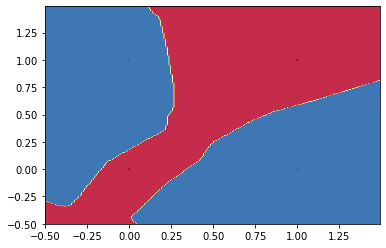

In [138]:
#Q1
#a)
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Net(nn.Module):
    
    def __init__(self):  # at least one hidden layer
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #relu/ sigmoid/ tanh
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x, dim=1)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.show()

#%% read data

###
data = pd.read_csv("C:/Users/Joyce/Desktop/DSC 275/Project 2/XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)

        if accuracy == 1:
            break
        print('Training accuracy is ', accuracy)
        
#%% compute accuracy on training data
    
net_out = net(data)
pred = net_out.data.max(1)[1]  # get the index of the max log-probability
correctidx = pred.eq(target.data) 
ncorrect = correctidx.sum()
accuracy = ncorrect.item()/len(data)
print('Training accuracy is ', accuracy)

#%%  plot outputs
plot_decision_boundary(net, X, y)

/var/folders/0y/1xswhtb9233dmfpnjsyf9zb00000gn/T/ipykernel_9960/815451585.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  0.7055659294128418
Training accuracy is  0.5
Epoch  10 Loss  0.698910117149353
Training accuracy is  0.5
Epoch  20 Loss  0.6932983994483948
Training accuracy is  0.5
Epoch  30 Loss  0.6921741366386414
Training accuracy is  0.75
Epoch  40 Loss  0.6920347809791565
Training accuracy is  0.5
Epoch  50 Loss  0.691649317741394
Training accuracy is  0.5
Epoch  60 Loss  0.6911942362785339
Training accuracy is  0.75
Epoch  70 Loss  0.6907813549041748
Training accuracy is  0.75
Epoch  80 Loss  0.6903955936431885
Training accuracy is  0.75
Epoch  90 Loss  0.6899825930595398
Training accuracy is  0.75
Epoch  100 Loss  0.6895026564598083
Training accuracy is  0.75
Epoch  110 Loss  0.6889151334762573
Training accuracy is  0.75
Epoch  120 Loss  0.6882807016372681
Training accuracy is  0.75
Epoch  130 Loss  0.687638521194458
Training accuracy is  0.75
Epoch  140 Loss  0.6868513822555542
Training accuracy is  0.75
Epoch  150 Loss  0.6858959197998047
Training accuracy is  0.75
Epoch  160 

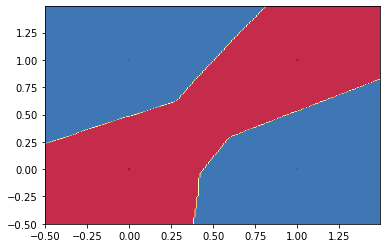

In [130]:
#b)
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Net(nn.Module):
    
    def __init__(self):  # at least one hidden layer
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.fc6 = nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #relu/ sigmoid/ tanh
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        #x = F.relu(self.fc6(x))
        x = self.fc6(x)
        return F.log_softmax(x)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.show()

#%% read data

###
data = pd.read_csv("C:/Users/Joyce/Desktop/DSC 275/Project 2/XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)

        if loss.item() < 10^(-4):
            break
        print('Training accuracy is ', accuracy)

#%%  plot outputs
plot_decision_boundary(net, X, y)

Epoch  0 Loss  0.7213282585144043
Training accuracy is  0.5
Epoch  50 Loss  0.6947168111801147
Training accuracy is  0.5
Epoch  100 Loss  0.6943885087966919
Training accuracy is  0.5
Epoch  150 Loss  0.6942739486694336
Training accuracy is  0.5
Epoch  200 Loss  0.6941733360290527
Training accuracy is  0.5
Epoch  250 Loss  0.6940838694572449
Training accuracy is  0.5
Epoch  300 Loss  0.694003701210022
Training accuracy is  0.5
Epoch  350 Loss  0.6939316391944885
Training accuracy is  0.5
Epoch  400 Loss  0.6938665509223938
Training accuracy is  0.5
Epoch  450 Loss  0.6938074231147766
Training accuracy is  0.5
Epoch  500 Loss  0.6937536597251892
Training accuracy is  0.5
Epoch  550 Loss  0.69370436668396
Training accuracy is  0.5
Epoch  600 Loss  0.6936591863632202
Training accuracy is  0.5
Epoch  650 Loss  0.6936176419258118
Training accuracy is  0.5
Epoch  700 Loss  0.6935791969299316
Training accuracy is  0.5
Epoch  750 Loss  0.6935436725616455
Training accuracy is  0.5
Epoch  800 Los

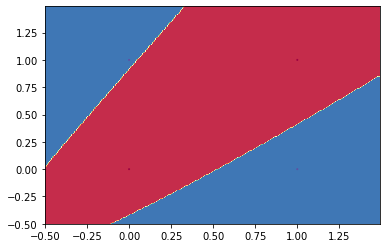

In [51]:
#c)
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Net(nn.Module):
    
    def __init__(self):  # at least one hidden layer
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 2)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x)) #relu/ sigmoid/ tanh
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.show()

#%% read data

###
data = pd.read_csv("C:/Users/Joyce/Desktop/DSC 275/Project 2/XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 10000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    if epoch % 50 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)

        if accuracy == 1:
            break
        print('Training accuracy is ', accuracy)
        
#%%  plot outputs
plot_decision_boundary(net, X, y)

In [115]:
#the least number of hidden layers and neurons that produces an accuracy of 1 on the training set is one hidden layer with 2 neurons.

Epoch  0 Loss  0.6959978938102722
Training accuracy is  0.5916159567275185
Epoch  50 Loss  0.19728685915470123
Training accuracy is  0.8982044925249794
Epoch  100 Loss  0.21174685657024384
Training accuracy is  0.8951243332582075
Epoch  150 Loss  0.23383787274360657
Training accuracy is  0.8908421606190369
Epoch  200 Loss  0.1966492235660553
Training accuracy is  0.8992562542258282
Epoch  250 Loss  0.19637583196163177
Training accuracy is  0.8988054992111787
Epoch  300 Loss  0.1951076239347458
Training accuracy is  0.899556757568928
Epoch  350 Loss  0.19415971636772156
Training accuracy is  0.899556757568928
Epoch  400 Loss  0.19806422293186188
Training accuracy is  0.8979039891818796
Epoch  450 Loss  0.19652755558490753
Training accuracy is  0.896626849973706
Epoch  500 Loss  0.2031368911266327
Training accuracy is  0.8932461873638344
Epoch  550 Loss  0.19284002482891083
Training accuracy is  0.9001577642551274
Epoch  600 Loss  0.19558052718639374
Training accuracy is  0.8987303733754

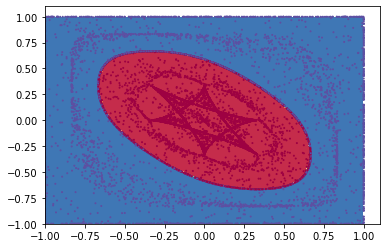

In [114]:
#Q2
#a)
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Net(nn.Module):
    
    def __init__(self):  # at least one hidden layer
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 80)
        self.fc2 = nn.Linear(80, 90)
        self.fc3 = nn.Linear(90, 100)
        self.fc4 = nn.Linear(100, 100)
        self.fc5 = nn.Linear(100, 2)

        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #relu/ sigmoid/ tanh
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
#     plt.savefig(filename)
    plt.show()

#%% read data

###
data = pd.read_csv("C:/Users/Joyce/Desktop/DSC 275/Project 2/FeedForward_Data_ellipse.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .02
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):    
#    adjust learning rate if desired
    if epoch % 300 == 0 and epoch <= 24000:
        for g in optimizer.param_groups:
            g['lr'] = g['lr']/1.5 #*0.7
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 50 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        
        if accuracy == 1:
            break
        print('Training accuracy is ', accuracy)
        
#%%  plot outputs
plot_decision_boundary(net, X, y)

In [133]:
#the best loss is 0.07266896218061447, and the best accuracy values 0.9756592292089249.
#the number of hidden layers: 4; type of activation function: F.relu; number of neurons per layer used: 80,90,100,100.

Epoch  0 Loss  0.6830448508262634
Training accuracy is  0.940575463902036
Epoch  10 Loss  0.22124066948890686
Training accuracy is  0.940575463902036
Epoch  20 Loss  0.2086293250322342
Training accuracy is  0.940575463902036
Epoch  30 Loss  0.19884918630123138
Training accuracy is  0.940575463902036
Epoch  40 Loss  0.18423084914684296
Training accuracy is  0.940575463902036
Epoch  50 Loss  0.16678142547607422
Training accuracy is  0.940575463902036
Epoch  60 Loss  0.14769347012043
Training accuracy is  0.940575463902036
Epoch  70 Loss  0.12851890921592712
Training accuracy is  0.940575463902036
Epoch  80 Loss  0.11100448668003082
Training accuracy is  0.940575463902036
Epoch  90 Loss  0.09534597396850586
Training accuracy is  0.940575463902036
Epoch  100 Loss  0.08311609923839569
Training accuracy is  0.940575463902036
Epoch  110 Loss  0.07379870116710663
Training accuracy is  0.9517692134324994
Epoch  120 Loss  0.06729332357645035
Training accuracy is  0.9708511757193299
Epoch  130 Lo

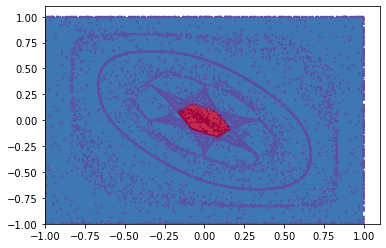

In [113]:
#b)
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Net(nn.Module):
    
    def __init__(self):  # at least one hidden layer
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 90)
        self.fc2 = nn.Linear(90, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 90)
        self.fc5 = nn.Linear(90, 2)

        
    def forward(self, x):
        x = F.relu(self.fc1(x)) #relu/ sigmoid/ tanh
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=1)
        #return F.softmax(x)

#%% plot function
        
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -1.0, 1.0
    y_min, y_max = -1.0, 1.0
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
#     plt.savefig(filename)
    plt.show()

#%% read data

###
data = pd.read_csv("C:/Users/Joyce/Desktop/DSC 275/Project 2/FeedForward_Data_hexa.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)

#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = .002
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
#criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()

# nepochs = 10000
nepochs = 3000
data, target = X, y
# run the main training loop
for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        
        if accuracy == 1:
            break
            
        print('Training accuracy is ', accuracy)

#%%  plot outputs
plot_decision_boundary(net, X, y)

In [134]:
#the best loss is 0.02821381203830242, and the best accuracy values 0.9903838930208099.
#the number of hidden layers: 4; type of activation function: F.relu; number of neurons per layer used: 90,100,100,90.